In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('mcd_merge.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.56458207, 0.5641259 , 0.57197607, 0.57987219, 0.57827458,
       0.57873074, 0.57416703, 0.57804615, 0.57599238, 0.57485163,
       0.57188483, 0.56823345, 0.56663584, 0.55682314, 0.55408477,
       0.55545395, 0.54815119, 0.54130528, 0.53263333, 0.5248744 ,
       0.51939767, 0.52441824, 0.53035113, 0.53217717, 0.52898194,
       0.52122302, 0.52692817, 0.53308949, 0.54404364, 0.54187565,
       0.53354635, 0.55134641, 0.56047452, 0.57325401, 0.56640811,
       0.57827458, 0.56366905, 0.5595615 , 0.5618437 , 0.56047452,
       0.56672707, 0.56047452, 0.56321288, 0.56047452, 0.56093068,
       0.56001836, 0.56275672, 0.56229986, 0.56376097, 0.55819232,
       0.54952037, 0.55317175, 0.56344131, 0.56458207, 0.56229986,
       0.55317175, 0.55088955, 0.55864918, 0.55499779, 0.56823345])]
[0.5750793582256062]

[array([0.56458207, 0.5641259 , 0.57197607, 0.57987219, 0.57827458,
       0.57873074, 0.57416703, 0.57804615, 0.57599238, 0.57485163,
       0.57188483, 0.56823345, 0.566

In [4]:
#cnn-lstm

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from numpy import array
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=1, activation='tanh', input_shape= (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True, activation='tanh' ))
model.add(Flatten())
model.add(Dense(1, activation='relu'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=100)


Epoch 1/100
104/104 [==============================] - 46s 168ms/step - loss: 0.0068
Epoch 2/100
104/104 [==============================] - 9s 85ms/step - loss: 0.0011
Epoch 3/100
104/104 [==============================] - 15s 144ms/step - loss: 9.7421e-04
Epoch 4/100
104/104 [==============================] - 20s 191ms/step - loss: 7.8932e-04
Epoch 5/100
104/104 [==============================] - 10s 90ms/step - loss: 6.9494e-04
Epoch 6/100
104/104 [==============================] - 21s 205ms/step - loss: 6.1210e-04
Epoch 7/100
104/104 [==============================] - 21s 206ms/step - loss: 5.7698e-04
Epoch 8/100
104/104 [==============================] - 18s 171ms/step - loss: 5.4143e-04
Epoch 9/100
104/104 [==============================] - 19s 178ms/step - loss: 4.6402e-04
Epoch 10/100
104/104 [==============================] - 18s 172ms/step - loss: 4.4215e-04
Epoch 11/100
104/104 [==============================] - 22s 212ms/step - loss: 4.1014e-04
Epoch 12/100
104/104 [========

104/104 [==============================] - 21s 200ms/step - loss: 1.0580e-04
Epoch 93/100
104/104 [==============================] - 21s 203ms/step - loss: 9.2231e-05
Epoch 94/100
104/104 [==============================] - 23s 226ms/step - loss: 8.9609e-05
Epoch 95/100
104/104 [==============================] - 19s 187ms/step - loss: 9.3077e-05
Epoch 96/100
104/104 [==============================] - 24s 230ms/step - loss: 1.1794e-04
Epoch 97/100
104/104 [==============================] - 23s 217ms/step - loss: 9.7477e-05
Epoch 98/100
104/104 [==============================] - 21s 199ms/step - loss: 9.3224e-05
Epoch 99/100
104/104 [==============================] - 20s 194ms/step - loss: 1.0546e-04
Epoch 100/100
104/104 [==============================] - 18s 173ms/step - loss: 9.3904e-05


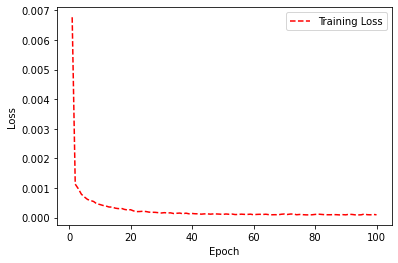

In [5]:
# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [6]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test) ** 2)))
rmse

0.19151609048643262

In [7]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions3'] = predictions3

mape(valid_3['Close'], valid_3['Predictions3'])

<ipython-input-7-cda6690b5d4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions3'] = predictions3


0.05759463371036001

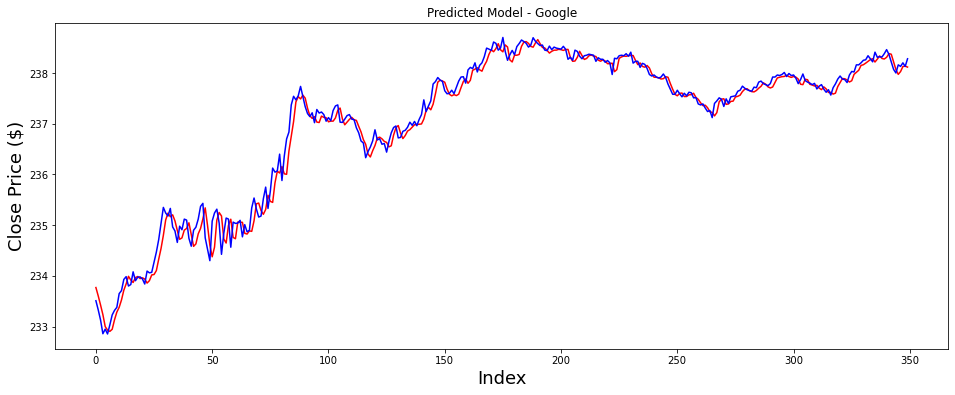

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Predicted Model - Google')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(predictions3,'r-', label = 'predict')
plt.plot(y_test,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()